# Decision Tree Classifier

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib
from scipy.stats import randint

## Loading the Processed Dataset

In [2]:
data = pd.read_csv("preprocessed.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,...,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,...,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,...,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,...,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


In [4]:
data.shape

(145460, 25)

In [5]:
df=data.sample(n=12000)

In [6]:
df.shape

(12000, 25)

## Dividing the dataset into Independent and Dependent features

In [7]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
y = df["RainTomorrow"]

### Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify = y, random_state = 0)

In [9]:
y_train

109369    0
92449     0
109607    0
110299    1
117823    0
         ..
86730     1
53188     0
126214    0
78402     0
105350    0
Name: RainTomorrow, Length: 9600, dtype: int64

## Handling imbalanced dataset

C:\Users\SWARNAVA\anaconda3\envs\rain\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

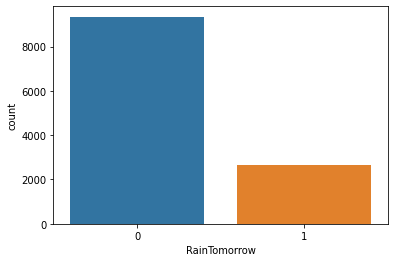

In [10]:
sns.countplot(df["RainTomorrow"])

In [11]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 7478, 1: 2122})
The number of classes after fit Counter({0: 7478, 1: 7478})


## Decision Tree Classifier

In [12]:
model_dt =  DecisionTreeClassifier(criterion='gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [13]:
model_dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [14]:
y_pred = model_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1467  402]
 [ 177  354]]
0.75875
              precision    recall  f1-score   support

           0       0.89      0.78      0.84      1869
           1       0.47      0.67      0.55       531

    accuracy                           0.76      2400
   macro avg       0.68      0.73      0.69      2400
weighted avg       0.80      0.76      0.77      2400



0.7257891920813269

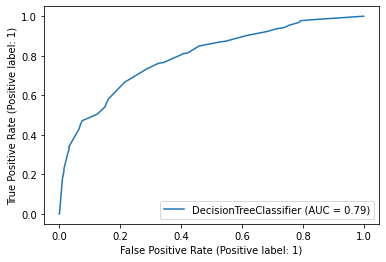

In [15]:
metrics.plot_roc_curve(model_dt, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None)

## Hyperparameter Optimization

In [16]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train_res,y_train_res)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 6}
Best score is 0.8023598201020172


In [18]:
from sklearn.metrics import accuracy_score
y_pred_tree = tree_cv.predict(X_test)
print(confusion_matrix(y_test,y_pred_tree))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred_tree)))
print('Classification report {}'.format(classification_report(y_test,y_pred_tree)))

[[1533  336]
 [ 253  278]]
Accuracy score 0.7545833333333334
Classification report               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1869
           1       0.45      0.52      0.49       531

    accuracy                           0.75      2400
   macro avg       0.66      0.67      0.66      2400
weighted avg       0.77      0.75      0.76      2400



## Saving the model to reuse it again

In [19]:
joblib.dump(tree_cv, "dt.pkl")

['dt.pkl']